# Problem Statement:
* You work in XYZ Company as a Python Data Scientist. The company officials have collected some data on
   Health parameter based on Diabetes and wish for you to create a model from it.
   
   Dataset: diabetes.csv

# Tasks to be performed
* Load the dataset using pandas
* Extract data fromOutcome column is a variable named Y
* Extract data from every column except Outcome column in a variable named X
* Divide the dataset into two parts for training and testing in 70% and 30% proportion
* Create and train Logistic Regression Model on training set
* Make predictions based on the testing set using the trained model
* Check the performance by calculating the confusion matrix and accuracy score of the model 


In [3]:
#Step1 : Loading Dataset :
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(dataset.shape)

(768, 9)


In [5]:
diabetes['Outcome'].value_counts()


#268 patients suffering from diabetes 
# 500 people doesnot have heart disease

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

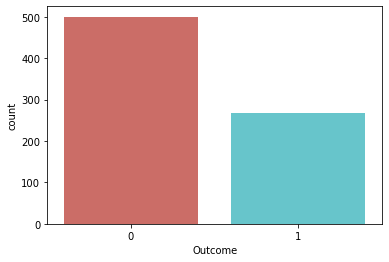

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(x='Outcome',data=diabetes,palette='hls')

* by above observation from above data we can undersrtand that pateint having diabetes  is less i.e is 268

In [7]:
# step3 Split dataset into features(X)  and target(Y) label sets


X = pd.DataFrame(diabetes.iloc[:,:-1])
Y = pd.DataFrame(diabetes.iloc[:,-1])

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# Step4 Divide the dataset into two parts for training and testing in 66% and 33% proportion


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# Step 5 Create and train Logistic Regression Model on training set

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [21]:
# Step 6 Make predictions based on the testing set using the trained model

In [22]:
# Predicting Test set Results
y_pred = logmodel.predict(X_test)

In [23]:
#calculation Accucuracy

print('Accuracy:',(logmodel.score(X_test,Y_test)))

Accuracy: 0.7835497835497836


# Evaluate model 

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[132  14]
 [ 36  49]]


* Note Result is tell us that we have 132 + 49 correct predictions and 14+36 incorrect predictions 

# 7. Check the performance by calculating the confusion matrix and accuracy score of the model 

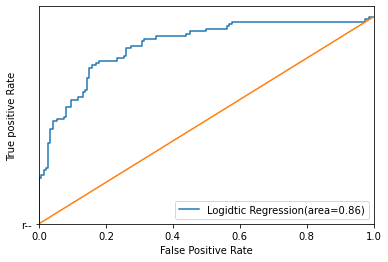

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve


logit_roc_curve = roc_auc_score(Y_test,logmodel.predict_proba(X_test)[:,1])

fpr,tpr,thresholds = roc_curve(Y_test,logmodel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr,tpr,label='Logidtic Regression(area=%0.2f)' %logit_roc_curve)
plt.plot([0,1],[0,1],['r--'])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc="lower right")
plt.savefig('log_ROC')